In [141]:
import pandas as pd
import numpy as np
# Load the dataset
file_path = "e:\\KULYEAH\\SEMESTER 3\\Data Mining\\Dataset\\US_Crime_DataSet.csv"
data = pd.read_csv(file_path)

# Filter out rows with missing values
clean_data = data.dropna()

# Select the first 100,000 records
subset_data = clean_data.head(100000)

# Save the subset to a new CSV file
output_path = "e:\\KULYEAH\SEMESTER 3\\Data Mining\\Project Fix\\archive\\US_Crime_DataSet_Filtered.csv"
subset_data.to_csv(output_path, index=False)

print(f"Subset of 100,000 records saved to {output_path}")


C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\3537465836.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Subset of 100,000 records saved to e:\KULYEAH\SEMESTER 3\Data Mining\Project Fix\archive\US_Crime_DataSet_Filtered.csv


In [142]:
# Create the data dictionary with descriptions and unique categorical values
data_dictionary = {
    "Record ID": "Unique identifier for each record",
    "Agency Code": "Unique code identifying the law enforcement agency",
    "Agency Name": "Name of the law enforcement agency",
    "Agency Type": "Type of agency (e.g., Municipal Police, Sheriff)",
    "City": "City where the crime occurred",
    "State": "State where the crime occurred",
    "Year": "Year of the incident",
    "Month": "Month of the incident",
    "Incident": "Incident number within the agency",
    "Crime Type": f"Type of crime (e.g., {crime_data['Crime Type'].unique().tolist()})",
    "Crime Solved": f"Whether the crime was solved (e.g., {crime_data['Crime Solved'].unique().tolist()})",
    "Victim Sex": f"Sex of the victim (e.g., {crime_data['Victim Sex'].unique().tolist()})",
    "Victim Age": "Age of the victim",
    "Victim Race": f"Race of the victim (e.g., {crime_data['Victim Race'].unique().tolist()})",
    "Victim Ethnicity": f"Ethnicity of the victim (e.g., {crime_data['Victim Ethnicity'].unique().tolist()})",
    "Perpetrator Sex": f"Sex of the perpetrator (e.g., {crime_data['Perpetrator Sex'].unique().tolist()})",
    "Perpetrator Age": "Age of the perpetrator",
    "Perpetrator Race": f"Race of the perpetrator (e.g., {crime_data['Perpetrator Race'].unique().tolist()})",
    "Perpetrator Ethnicity": f"Ethnicity of the perpetrator (e.g., {crime_data['Perpetrator Ethnicity'].unique().tolist()})",
    "Relationship": f"Relationship between victim and perpetrator (e.g., {crime_data['Relationship'].unique().tolist()})",
    "Weapon": f"Weapon used in the crime (e.g., {crime_data['Weapon'].unique().tolist()})",
    "Victim Count": "Number of victims in the incident",
    "Perpetrator Count": "Number of perpetrators in the incident",
    "Record Source": "Source of the record (e.g., FBI)"
}

# Convert the data dictionary to a DataFrame for better visualization
data_dictionary_df = pd.DataFrame(list(data_dictionary.items()), columns=["Column Name", "Description"])

# Save the data dictionary to a CSV file (optional)
data_dictionary_df.to_csv('crime_data_dictionary.csv', index=False)

# Display the DataFrame
print(data_dictionary_df)

              Column Name                                        Description
0               Record ID                  Unique identifier for each record
1             Agency Code  Unique code identifying the law enforcement ag...
2             Agency Name                 Name of the law enforcement agency
3             Agency Type   Type of agency (e.g., Municipal Police, Sheriff)
4                    City                      City where the crime occurred
5                   State                     State where the crime occurred
6                    Year                               Year of the incident
7                   Month                              Month of the incident
8                Incident                  Incident number within the agency
9              Crime Type  Type of crime (e.g., ['Murder or Manslaughter'...
10           Crime Solved  Whether the crime was solved (e.g., ['Yes', 'N...
11             Victim Sex  Sex of the victim (e.g., ['Male', 'Female', 'U...

In [143]:
# Treat 0 as missing for Perpetrator Age
crime_data['Perpetrator Age'] = crime_data['Perpetrator Age'].replace(0, np.nan)

# Check for missing values
missing_summary = crime_data.isnull().sum()

# Check for 'Unknown' entries
unknown_summary = (crime_data == 'Unknown').sum()

# Combine the summaries into a single DataFrame
missing_and_unknown_summary = pd.DataFrame({
    "Column": crime_data.columns,
    "Missing Values": missing_summary,
    "'Unknown' Entries": unknown_summary
}).reset_index(drop=True)

# Save the summary to a CSV file for reference
missing_and_unknown_summary.to_csv('missing_and_unknown_summary.csv', index=False)

# Print the summary
print("Missing Values and 'Unknown' Entries Summary:")
print(missing_and_unknown_summary)

# Optional: Print percentage of missing values
print("\nPercentage of Missing Values:")
percentage_missing = (missing_summary / len(crime_data) * 100).round(2)
for column, percentage in percentage_missing.items():
    print(f"{column}: {percentage}%")

Missing Values and 'Unknown' Entries Summary:
                   Column  Missing Values  'Unknown' Entries
0               Record ID               0                  0
1             Agency Code               0                  0
2             Agency Name               0                 47
3             Agency Type               0                  0
4                    City               0                  0
5                   State               0                  0
6                    Year               0                  0
7                   Month               0                  0
8                Incident               0                  0
9              Crime Type               0                  0
10           Crime Solved               0                  0
11             Victim Sex               0                984
12             Victim Age               0                  0
13            Victim Race               0               6676
14       Victim Ethnicity              

In [144]:
# Convert 'Year' and 'Month' into a single datetime column
crime_data['Incident Date'] = pd.to_datetime(
    crime_data['Year'].astype(str) + '-' + crime_data['Month'], errors='coerce'
)

# Ensure numerical columns are in the correct format
numeric_columns = ['Victim Age', 'Perpetrator Age', 'Victim Count', 'Perpetrator Count']
crime_data[numeric_columns] = crime_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert categorical columns to appropriate data types
categorical_columns = [
    'Agency Code', 'Agency Name', 'Agency Type', 'City', 'State', 'Crime Type', 
    'Crime Solved', 'Victim Sex', 'Victim Race', 'Victim Ethnicity',
    'Perpetrator Sex', 'Perpetrator Race', 'Perpetrator Ethnicity', 
    'Relationship', 'Weapon', 'Record Source'
]
crime_data[categorical_columns] = crime_data[categorical_columns].astype('category')

# Save the updated dataset to a new CSV file (optional)
crime_data.to_csv('cleaned_crime_data.csv', index=False)

# Print a summary of the conversions
conversion_summary = pd.DataFrame({
    "Column": crime_data.columns,
    "Data Type": crime_data.dtypes,
    "Sample Values": [crime_data[col].dropna().unique()[:5] for col in crime_data.columns]
})

# Save the summary to a CSV file for reference (optional)
conversion_summary.to_csv('data_type_conversion_summary.csv', index=False)

# Print the summary
print(conversion_summary)

C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\2506123814.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['Incident Date'] = pd.to_datetime(


                                      Column       Data Type  \
Record ID                          Record ID           int64   
Agency Code                      Agency Code        category   
Agency Name                      Agency Name        category   
Agency Type                      Agency Type        category   
City                                    City        category   
State                                  State        category   
Year                                    Year           int64   
Month                                  Month          object   
Incident                            Incident           int64   
Crime Type                        Crime Type        category   
Crime Solved                    Crime Solved        category   
Victim Sex                        Victim Sex        category   
Victim Age                        Victim Age           int64   
Victim Race                      Victim Race        category   
Victim Ethnicity            Victim Ethni

In [145]:
consistency_issues = crime_data[
    (crime_data['Victim Count'] < 0) |
    (crime_data['Perpetrator Count'] < 0) |
    (crime_data['Victim Count'] > 0) & (crime_data['Victim Sex'] == 'Unknown') |
    (crime_data['Perpetrator Count'] > 0) & (crime_data['Perpetrator Sex'] == 'Unknown')
]

# Create a summary for any inconsistencies
inconsistency_summary = consistency_issues[['Record ID', 'Victim Count', 'Victim Sex', 'Perpetrator Count', 'Perpetrator Sex']]

# Display the summary of inconsistencies
print("Inconsistencies in Victim and Perpetrator Counts:")
print(inconsistency_summary)

# Optionally, you can also save to a CSV if needed
inconsistency_summary.to_csv('inconsistency_summary.csv', index=False)

Inconsistencies in Victim and Perpetrator Counts:
        Record ID  Victim Count Victim Sex  Perpetrator Count Perpetrator Sex
4               5             0     Female                  1         Unknown
10             11             0       Male                  1         Unknown
55             56             0       Male                  1         Unknown
59             60             0       Male                  1         Unknown
111           112             0     Female                  1         Unknown
...           ...           ...        ...                ...             ...
638389     638390             0       Male                  2         Unknown
638394     638395             0       Male                  1         Unknown
638436     638437             0       Male                  1         Unknown
638437     638438             0       Male                  2         Unknown
638438     638439             0     Female                  2         Unknown

[6291 rows x 

In [146]:
# Impute missing values for consistency
# Correct Victim Count where Victim Sex is specified but Victim Count is 0
crime_data.loc[
    (crime_data['Victim Count'] == 0) & (crime_data['Victim Sex'] != 'Unknown'),
    'Victim Count'
] = 1

# Correct Perpetrator Count where Perpetrator Sex is specified but Perpetrator Count is 0
crime_data.loc[
    (crime_data['Perpetrator Count'] == 0) & (crime_data['Perpetrator Sex'] != 'Unknown'),
    'Perpetrator Count'
] = 1

# Replace 'Unknown' in Victim Sex or Perpetrator Sex with a new category 'Unspecified'
crime_data['Victim Sex'] = crime_data['Victim Sex'].replace('Unknown', 'Unspecified')
crime_data['Perpetrator Sex'] = crime_data['Perpetrator Sex'].replace('Unknown', 'Unspecified')

# Verify if the inconsistencies have been resolved
resolved_inconsistencies = crime_data[
    (crime_data['Victim Count'] < 0) |
    (crime_data['Perpetrator Count'] < 0) |
    (crime_data['Victim Count'] > 0) & (crime_data['Victim Sex'] == 'Unspecified') |
    (crime_data['Perpetrator Count'] > 0) & (crime_data['Perpetrator Sex'] == 'Unspecified')
]

# Display the dataset after imputing for inconsistencies
print("Dataset After Imputing Inconsistencies:")
print(crime_data)

# Show the count of unresolved inconsistencies (should be 0)
unresolved_count = len(resolved_inconsistencies)
print(f"\nNumber of Unresolved Inconsistencies: {unresolved_count}")

# Optionally, if you want to see the unresolved inconsistencies
if unresolved_count > 0:
    print("\nUnresolved Inconsistencies:")
    print(resolved_inconsistencies)

Dataset After Imputing Inconsistencies:
        Record ID Agency Code      Agency Name       Agency Type        City  \
0               1     AK00101        Anchorage  Municipal Police   Anchorage   
1               2     AK00101        Anchorage  Municipal Police   Anchorage   
2               3     AK00101        Anchorage  Municipal Police   Anchorage   
3               4     AK00101        Anchorage  Municipal Police   Anchorage   
4               5     AK00101        Anchorage  Municipal Police   Anchorage   
...           ...         ...              ...               ...         ...   
638449     638450     WY01500      Park County           Sheriff        Park   
638450     638451     WY01700  Sheridan County           Sheriff    Sheridan   
638451     638452     WY01701         Sheridan  Municipal Police    Sheridan   
638452     638453     WY01800  Sublette County           Sheriff    Sublette   
638453     638454     WY01902     Rock Springs  Municipal Police  Sweetwater   


C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\1241004243.py:15: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  crime_data['Victim Sex'] = crime_data['Victim Sex'].replace('Unknown', 'Unspecified')
C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\1241004243.py:16: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  crime_data['Perpetrator Sex'] = crime_data['Perpetrator Sex'].replace('Unknown', 'Unspecified')


In [147]:
import numpy as np
import pandas as pd

# Define a function to detect outliers using the IQR method
def detect_outliers(data, column):
    Q1 = np.percentile(data[column].dropna(), 25)  # First quartile
    Q3 = np.percentile(data[column].dropna(), 75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in Victim Count and Perpetrator Count
victim_count_outliers = detect_outliers(crime_data, 'Victim Count')
perpetrator_count_outliers = detect_outliers(crime_data, 'Perpetrator Count')

# Combine outlier data for reporting
outlier_summary = pd.concat([
    victim_count_outliers[['Record ID', 'Victim Count', 'Perpetrator Count']],
    perpetrator_count_outliers[['Record ID', 'Victim Count', 'Perpetrator Count']]
]).drop_duplicates()

# Display the outlier summary
print("Outliers in Victim and Perpetrator Counts:")
print(outlier_summary)

# Optional: Additional information about outliers
print("\nNumber of Victim Count Outliers:", len(victim_count_outliers))
print("Number of Perpetrator Count Outliers:", len(perpetrator_count_outliers))

# Optional: Save outliers to a CSV file
outlier_summary.to_csv('outliers_summary.csv', index=False)

Outliers in Victim and Perpetrator Counts:
        Record ID  Victim Count  Perpetrator Count
20             21             2                  1
21             22             2                  1
24             25             2                  1
314           315             2                  1
315           316             2                  1
...           ...           ...                ...
638343     638344             1                  3
638353     638354             1                  4
638387     638388             1                  3
638410     638411             1                  3
638444     638445             1                  3

[23084 rows x 3 columns]

Number of Victim Count Outliers: 14546
Number of Perpetrator Count Outliers: 9094


In [148]:
# Exclude outliers from the dataset
victim_outlier_ids = victim_count_outliers['Record ID'].tolist()
perpetrator_outlier_ids = perpetrator_count_outliers['Record ID'].tolist()
outlier_ids = set(victim_outlier_ids + perpetrator_outlier_ids)

# Filter the dataset to exclude outliers
cleaned_crime_data = crime_data[~crime_data['Record ID'].isin(outlier_ids)]

# Display the cleaned dataset
print("Dataset After Removing Outliers:")
print(cleaned_crime_data)

# Optional: Print some statistics about the cleaning process
print("\nOriginal Dataset Size:", len(crime_data))
print("Cleaned Dataset Size:", len(cleaned_crime_data))
print("Number of Outliers Removed:", len(crime_data) - len(cleaned_crime_data))

# Optional: Save the cleaned dataset to a CSV
# cleaned_crime_data.to_csv('cleaned_crime_data.csv', index=False)

Dataset After Removing Outliers:
        Record ID Agency Code      Agency Name       Agency Type        City  \
0               1     AK00101        Anchorage  Municipal Police   Anchorage   
1               2     AK00101        Anchorage  Municipal Police   Anchorage   
2               3     AK00101        Anchorage  Municipal Police   Anchorage   
3               4     AK00101        Anchorage  Municipal Police   Anchorage   
4               5     AK00101        Anchorage  Municipal Police   Anchorage   
...           ...         ...              ...               ...         ...   
638449     638450     WY01500      Park County           Sheriff        Park   
638450     638451     WY01700  Sheridan County           Sheriff    Sheridan   
638451     638452     WY01701         Sheridan  Municipal Police    Sheridan   
638452     638453     WY01800  Sublette County           Sheriff    Sublette   
638453     638454     WY01902     Rock Springs  Municipal Police  Sweetwater   

      

C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\2176053311.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temporal_trends['Incident Date'] = pd.to_datetime(


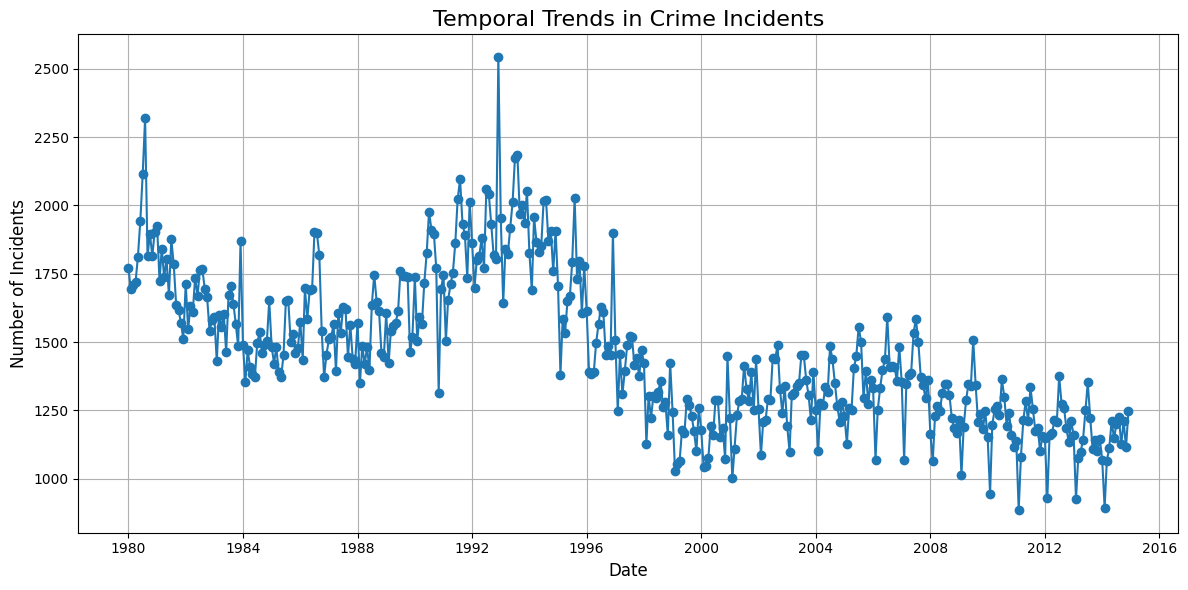

In [149]:
import matplotlib.pyplot as plt

# Group data by year and month to count incidents
temporal_trends = (
    cleaned_crime_data.groupby(['Year', 'Month'])
    .size()
    .reset_index(name='Incident Count')
)

# Ensure the data is sorted correctly
temporal_trends['Incident Date'] = pd.to_datetime(
    temporal_trends['Year'].astype(str) + '-' + temporal_trends['Month'],
    errors='coerce'
)
temporal_trends = temporal_trends.sort_values('Incident Date')

# Plot the temporal trends in crime incidents
plt.figure(figsize=(12, 6))
plt.plot(temporal_trends['Incident Date'], temporal_trends['Incident Count'], marker='o', linestyle='-')
plt.title('Temporal Trends in Crime Incidents', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\2763392222.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_data.groupby('Perpetrator Race')


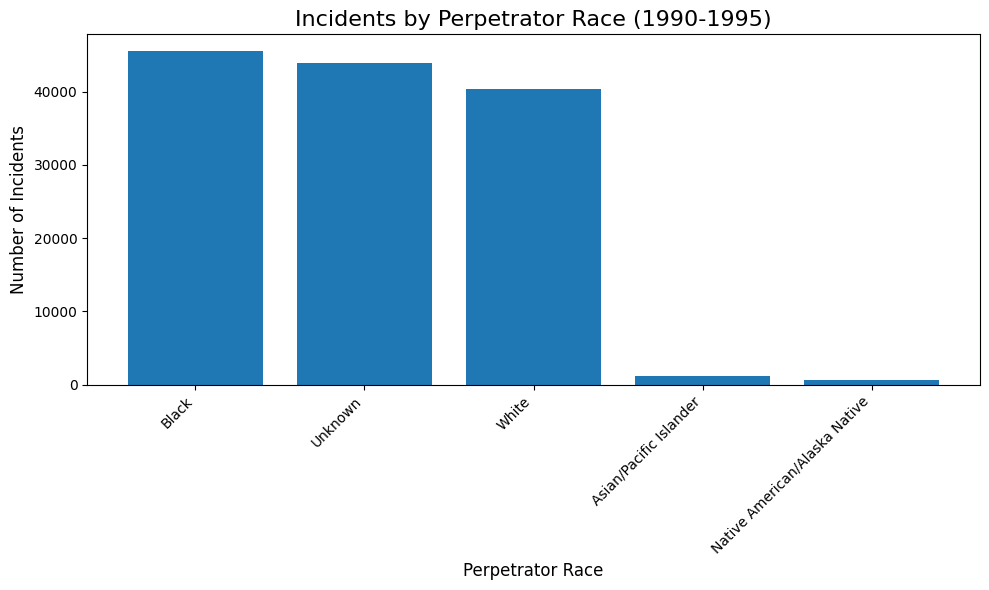

In [150]:
# Filter data for the years 1990 to 1995
filtered_data = cleaned_crime_data[
    (cleaned_crime_data['Year'] >= 1990) & (cleaned_crime_data['Year'] <= 1995)
]

# Group data by perpetrator race and count incidents
perpetrator_race_counts = (
    filtered_data.groupby('Perpetrator Race')
    .size()
    .reset_index(name='Incident Count')
    .sort_values('Incident Count', ascending=False)
)

# Plot perpetrator race vs incidents
plt.figure(figsize=(10, 6))
plt.bar(perpetrator_race_counts['Perpetrator Race'], perpetrator_race_counts['Incident Count'])
plt.title('Incidents by Perpetrator Race (1990-1995)', fontsize=16)
plt.xlabel('Perpetrator Race', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\666032637.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_data.groupby('Weapon')
C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\666032637.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_data.groupby('City')


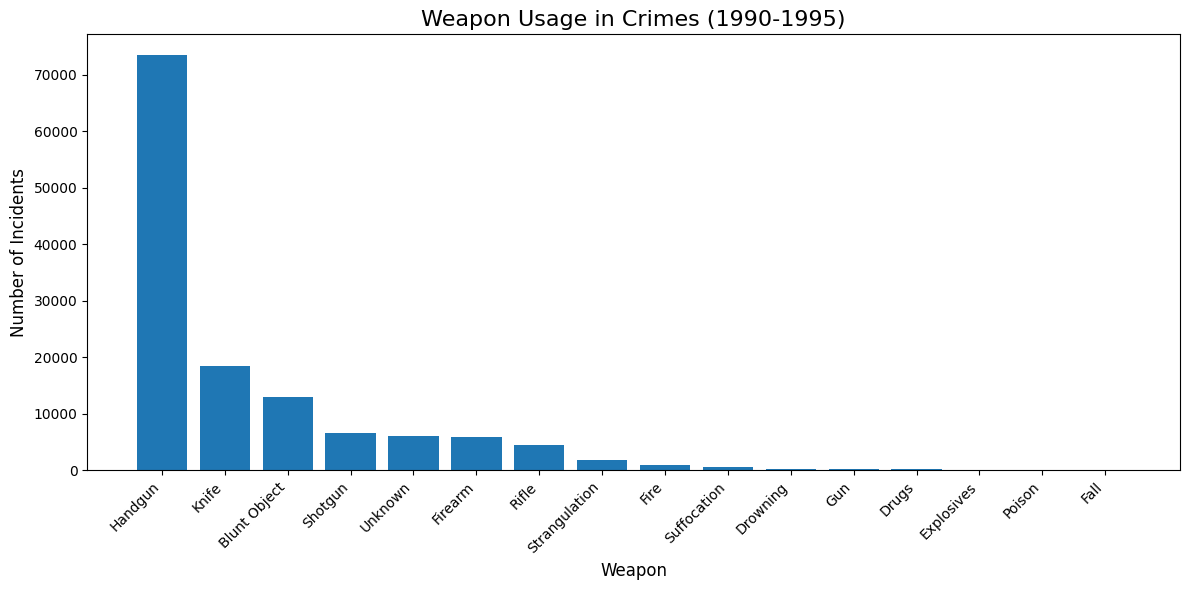

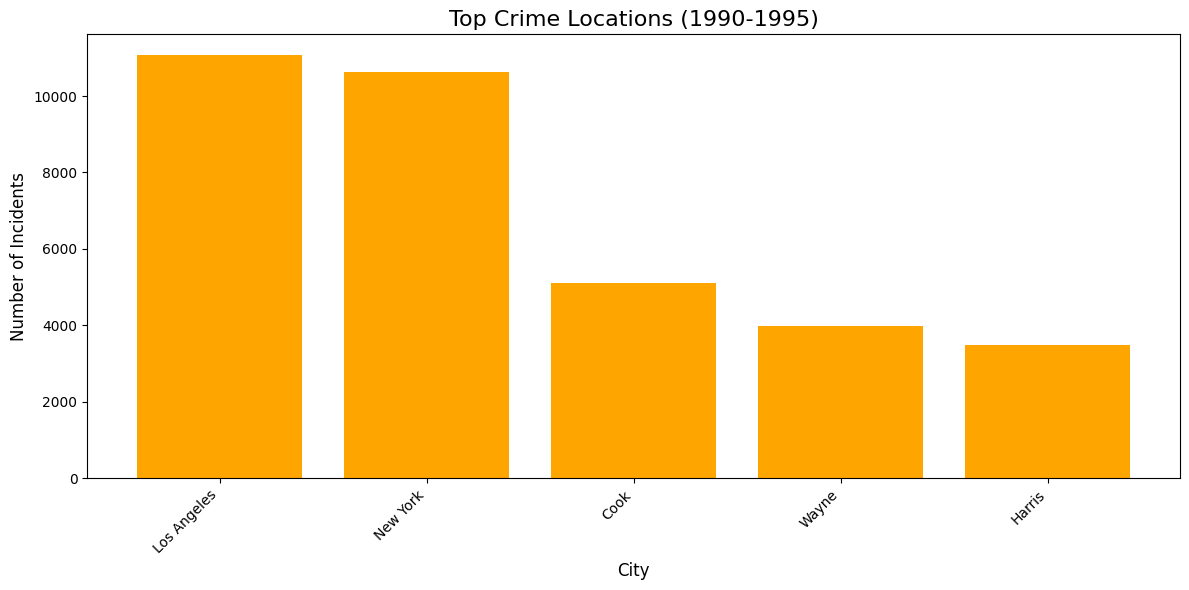

In [151]:
# Group data for weapon usage and count incidents
weapon_usage = (
    filtered_data.groupby('Weapon')
    .size()
    .reset_index(name='Incident Count')
    .sort_values('Incident Count', ascending=False)
)

# Get top 5 locations with the highest crime counts
top_locations = (
    filtered_data.groupby('City')
    .size()
    .reset_index(name='Incident Count')
    .sort_values('Incident Count', ascending=False)
    .head(5)
)

# Plot weapon usage
plt.figure(figsize=(12, 6))
plt.bar(weapon_usage['Weapon'], weapon_usage['Incident Count'])
plt.title('Weapon Usage in Crimes (1990-1995)', fontsize=16)
plt.xlabel('Weapon', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot top crime locations
plt.figure(figsize=(12, 6))
plt.bar(top_locations['City'], top_locations['Incident Count'], color='orange')
plt.title('Top Crime Locations (1990-1995)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\3716452163.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_crime_data.groupby(['Year', 'Crime Solved'])


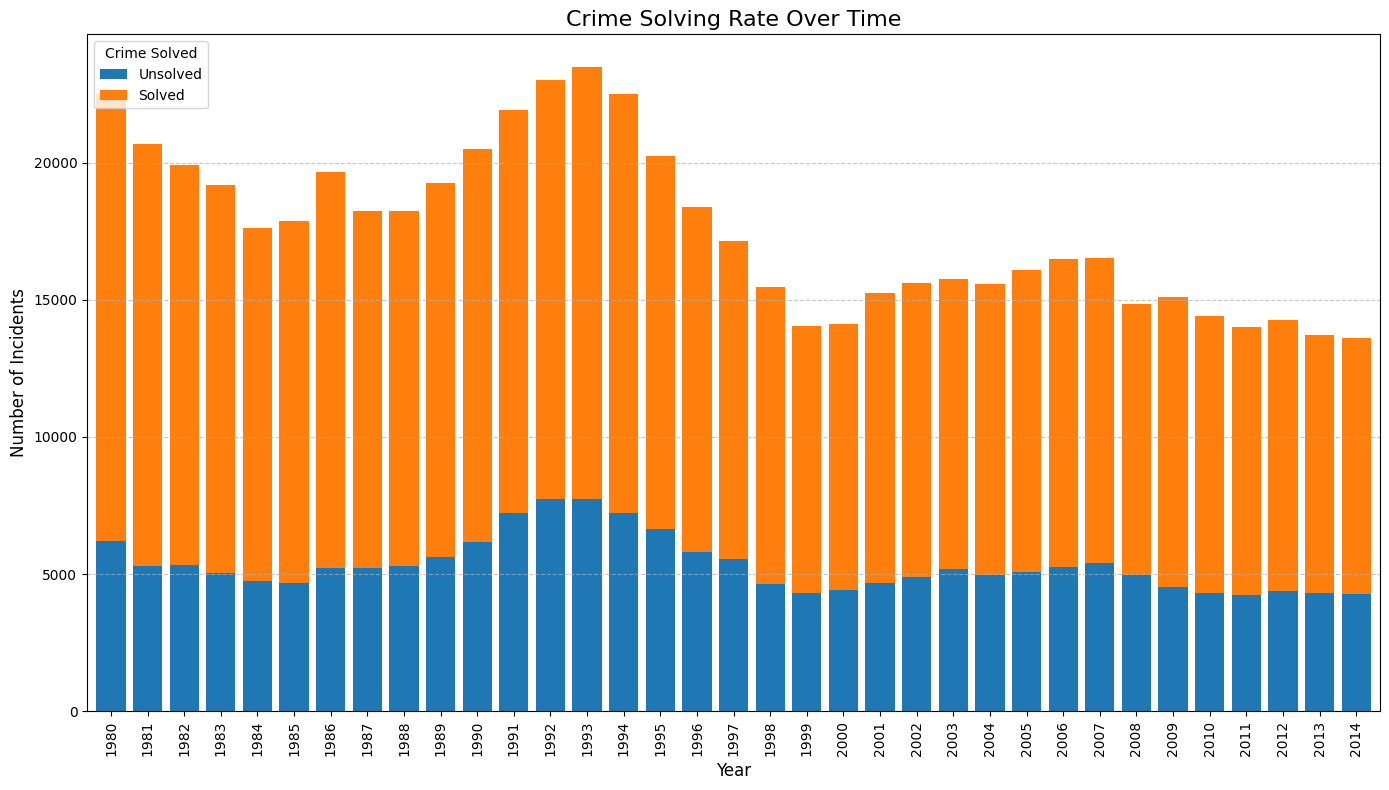

In [152]:
# Group data by year to calculate solved and unsolved counts
crime_solving = (
    cleaned_crime_data.groupby(['Year', 'Crime Solved'])
    .size()
    .reset_index(name='Incident Count')
)

# Pivot data for plotting
crime_solving_pivot = crime_solving.pivot(
    index='Year', columns='Crime Solved', values='Incident Count'
).fillna(0)

# Ensure the columns are correctly labeled
crime_solving_pivot.columns = ['Unsolved', 'Solved']

# Plot the crime-solving rates over time as a stacked bar chart
crime_solving_pivot.plot(
    kind='bar', stacked=True, figsize=(14, 8), width=0.8
)
plt.title('Crime Solving Rate Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.legend(title='Crime Solved', loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\1858902621.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_crime_data.groupby('Crime Type')


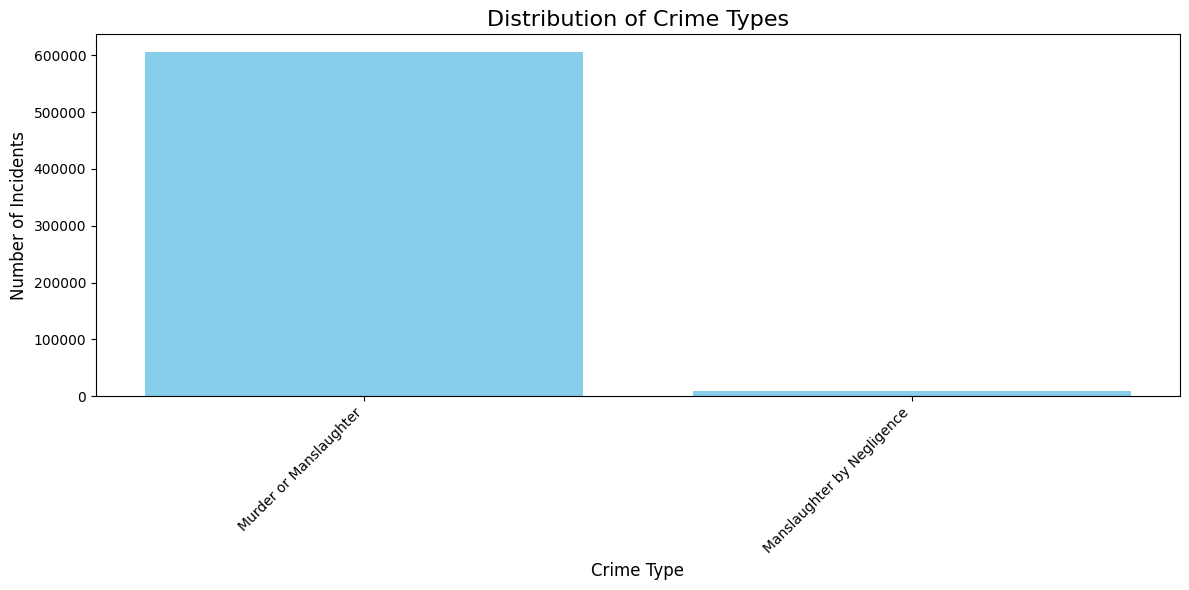

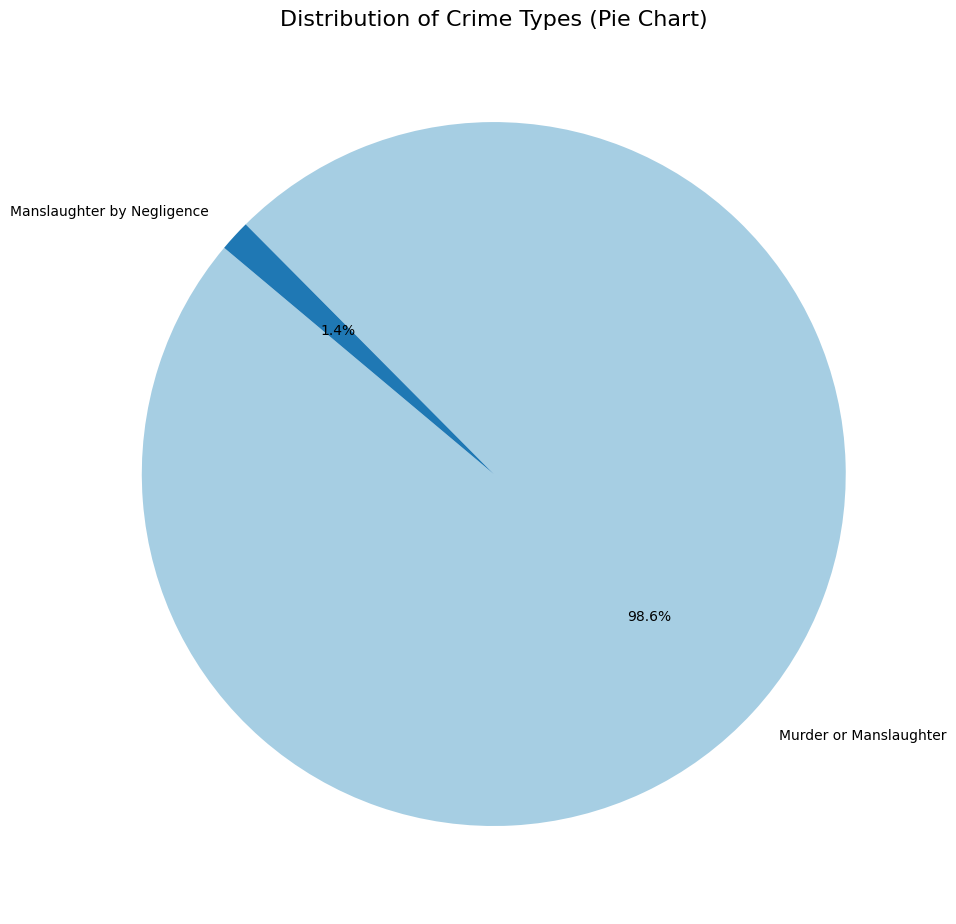

In [153]:
# Group data by 'Crime Type' and count incidents
crime_type_distribution = (
    cleaned_crime_data.groupby('Crime Type')
    .size()
    .reset_index(name='Incident Count')
    .sort_values('Incident Count', ascending=False)
)

# Plot the distribution of crime types as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(crime_type_distribution['Crime Type'], crime_type_distribution['Incident Count'], color='skyblue')
plt.title('Distribution of Crime Types', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the distribution of crime types as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    crime_type_distribution['Incident Count'],
    labels=crime_type_distribution['Crime Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribution of Crime Types (Pie Chart)', fontsize=16)
plt.tight_layout()
plt.show()


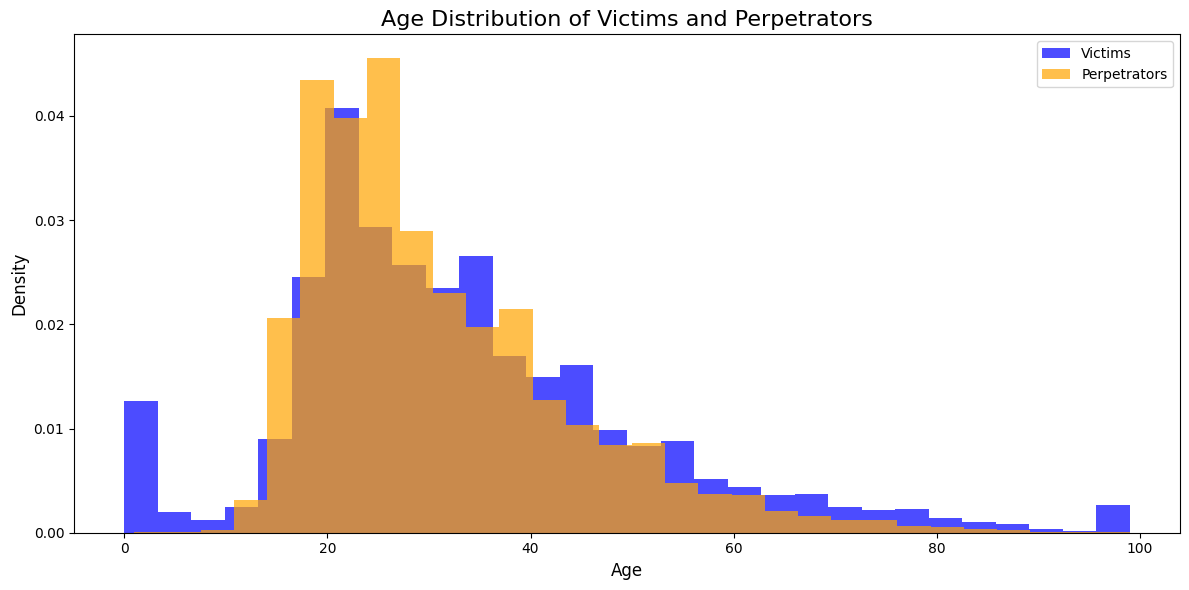

C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\4281184571.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographics_victims = age_filtered_data.groupby(['Victim Sex', 'Victim Race', 'Victim Ethnicity']).size().reset_index(name='Victim Count')
C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\4281184571.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographics_perpetrators = age_filtered_data.groupby(['Perpetrator Sex', 'Perpetrator Race', 'Perpetrator Ethnicity']).size().reset_index(name='Perpetrator Count')


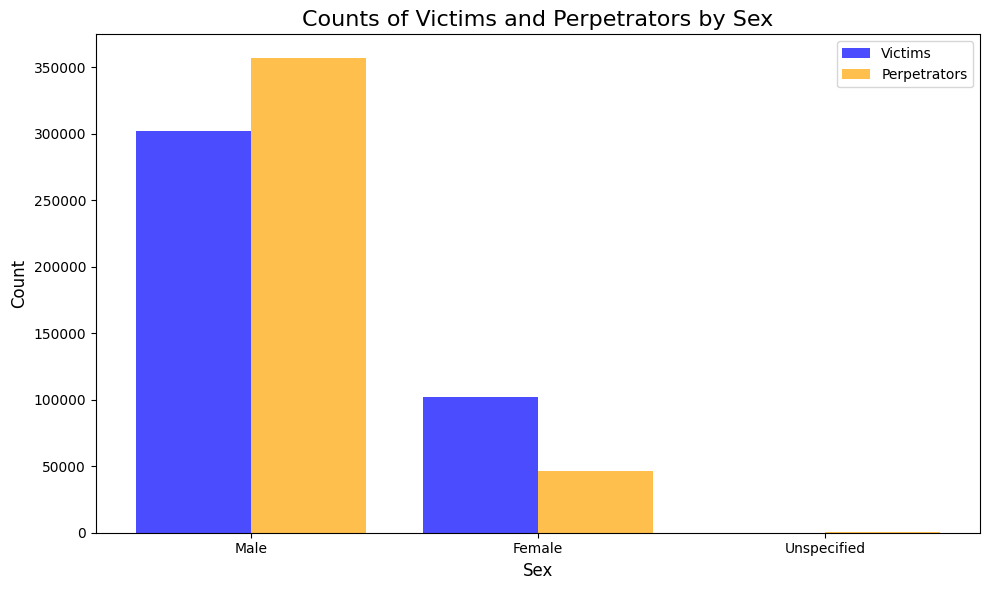

In [154]:
# Filter data to include only ages within a valid range (0-120)
age_filtered_data = cleaned_crime_data[
    (cleaned_crime_data['Victim Age'] >= 0) & (cleaned_crime_data['Victim Age'] <= 120) &
    (cleaned_crime_data['Perpetrator Age'] >= 0) & (cleaned_crime_data['Perpetrator Age'] <= 120)
]

# Plot age distributions for victims and perpetrators
plt.figure(figsize=(12, 6))
plt.hist(age_filtered_data['Victim Age'], bins=30, alpha=0.7, label='Victims', color='blue', density=True)
plt.hist(age_filtered_data['Perpetrator Age'], bins=30, alpha=0.7, label='Perpetrators', color='orange', density=True)
plt.title('Age Distribution of Victims and Perpetrators', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Group data by sex, race, and ethnicity for victims and perpetrators
demographics_victims = age_filtered_data.groupby(['Victim Sex', 'Victim Race', 'Victim Ethnicity']).size().reset_index(name='Victim Count')
demographics_perpetrators = age_filtered_data.groupby(['Perpetrator Sex', 'Perpetrator Race', 'Perpetrator Ethnicity']).size().reset_index(name='Perpetrator Count')

# Combine demographics into a single dataset for plotting
victim_sex = age_filtered_data['Victim Sex'].value_counts()
perp_sex = age_filtered_data['Perpetrator Sex'].value_counts()

# Plot grouped bar chart for sex
plt.figure(figsize=(10, 6))
bar_width = 0.4
x = range(len(victim_sex))
plt.bar(x, victim_sex, bar_width, label='Victims', color='blue', alpha=0.7)
plt.bar([p + bar_width for p in x], perp_sex, bar_width, label='Perpetrators', color='orange', alpha=0.7)
plt.title('Counts of Victims and Perpetrators by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([p + bar_width / 2 for p in x], victim_sex.index)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\4283884446.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_crime_data.groupby('Relationship')


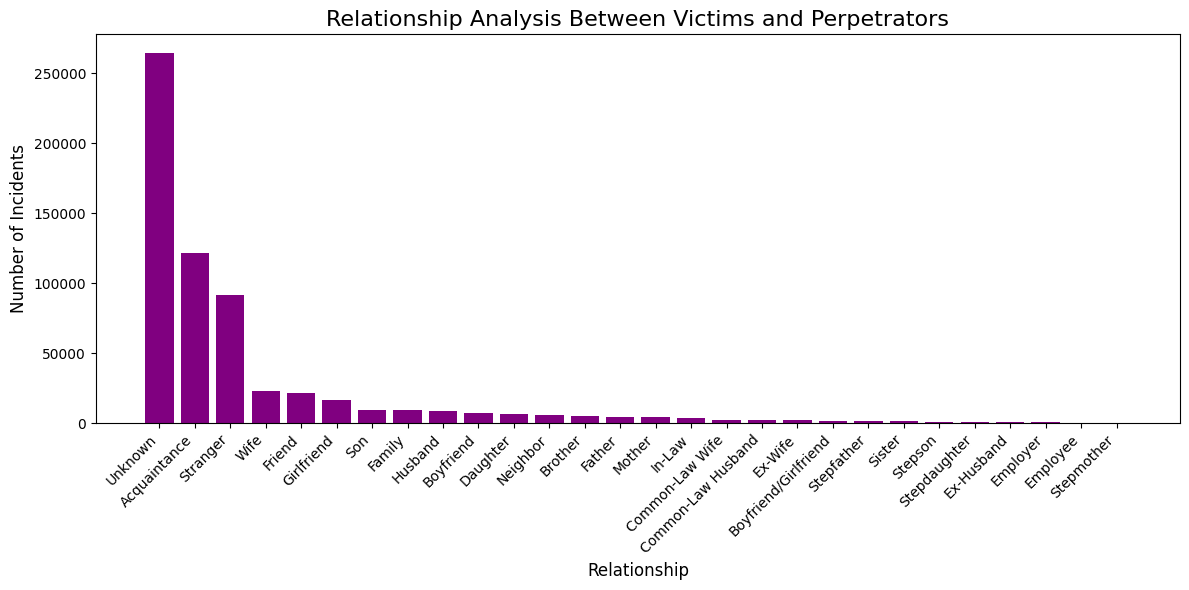

In [155]:
# Group data by 'Relationship' and count incidents
relationship_counts = (
    cleaned_crime_data.groupby('Relationship')
    .size()
    .reset_index(name='Incident Count')
    .sort_values('Incident Count', ascending=False)
)

# Plot the frequency of different relationships as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(relationship_counts['Relationship'], relationship_counts['Incident Count'], color='purple')
plt.title('Relationship Analysis Between Victims and Perpetrators', fontsize=16)
plt.xlabel('Relationship', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\4017672889.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_crime_data.groupby('Weapon')


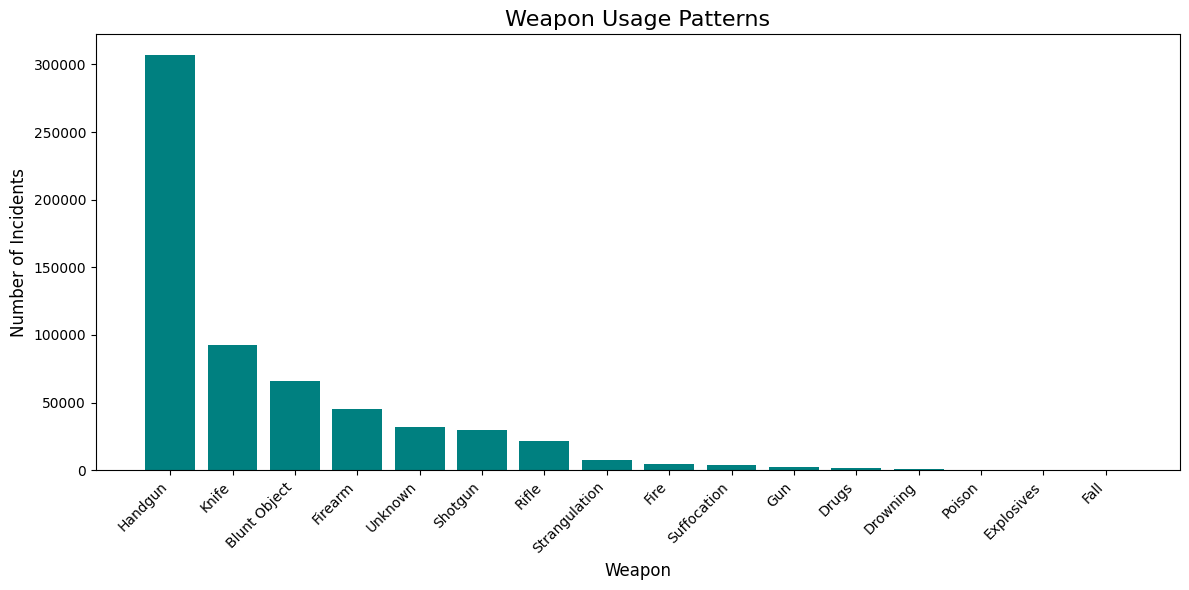

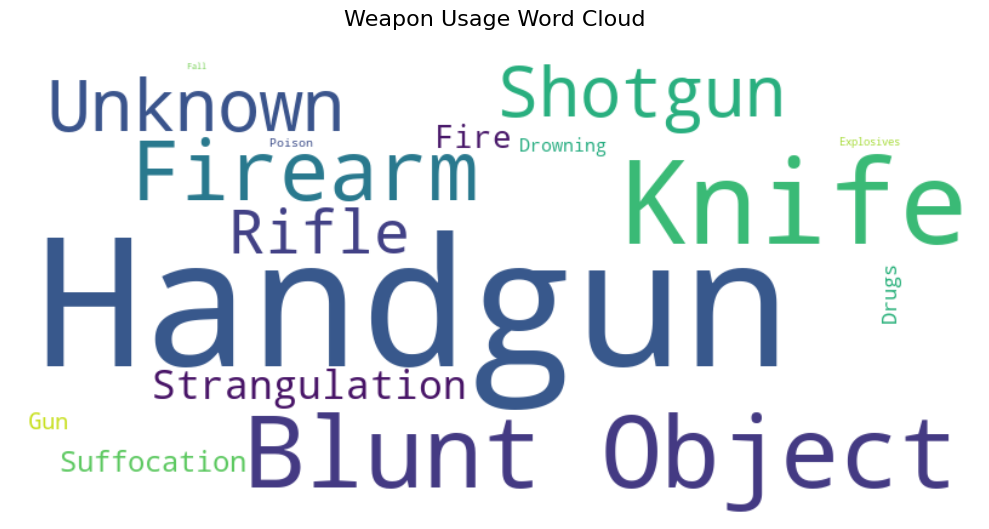

In [156]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Group data by 'Weapon' and count incidents
weapon_usage = (
    cleaned_crime_data.groupby('Weapon')
    .size()
    .reset_index(name='Incident Count')
    .sort_values('Incident Count', ascending=False)
)

# Plot the frequency of different weapon types as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(weapon_usage['Weapon'], weapon_usage['Incident Count'], color='teal')
plt.title('Weapon Usage Patterns', fontsize=16)
plt.xlabel('Weapon', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Generate a word cloud for weapon usage
weapon_wordcloud = WordCloud(
    width=800, height=400, background_color='white'
).generate_from_frequencies(dict(zip(weapon_usage['Weapon'], weapon_usage['Incident Count'])))

plt.figure(figsize=(10, 6))
plt.imshow(weapon_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Weapon Usage Word Cloud', fontsize=16)
plt.tight_layout()
plt.show()


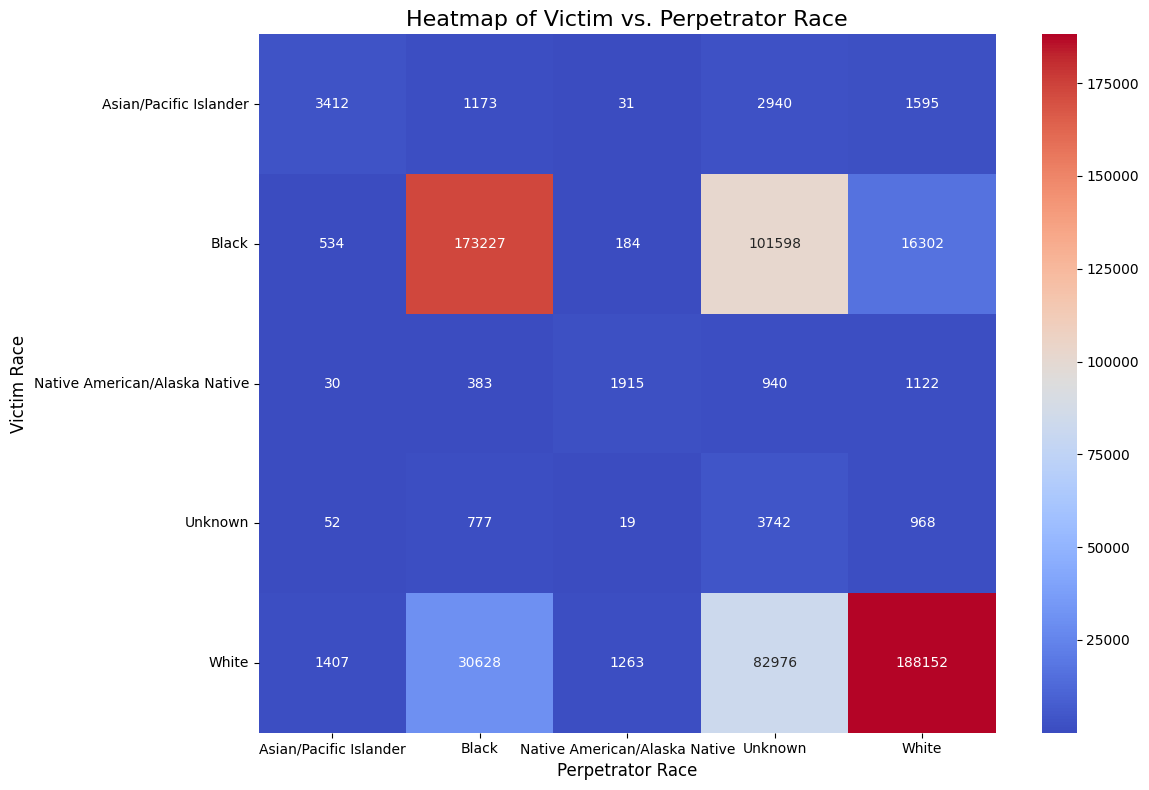

In [157]:
import seaborn as sns

# Create a cross-tabulation of victim race vs. perpetrator race
race_crosstab = pd.crosstab(
    cleaned_crime_data['Victim Race'],
    cleaned_crime_data['Perpetrator Race']
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    race_crosstab, annot=True, fmt='d', cmap='coolwarm', cbar=True
)
plt.title('Heatmap of Victim vs. Perpetrator Race', fontsize=16)
plt.xlabel('Perpetrator Race', fontsize=12)
plt.ylabel('Victim Race', fontsize=12)
plt.tight_layout()
plt.show()


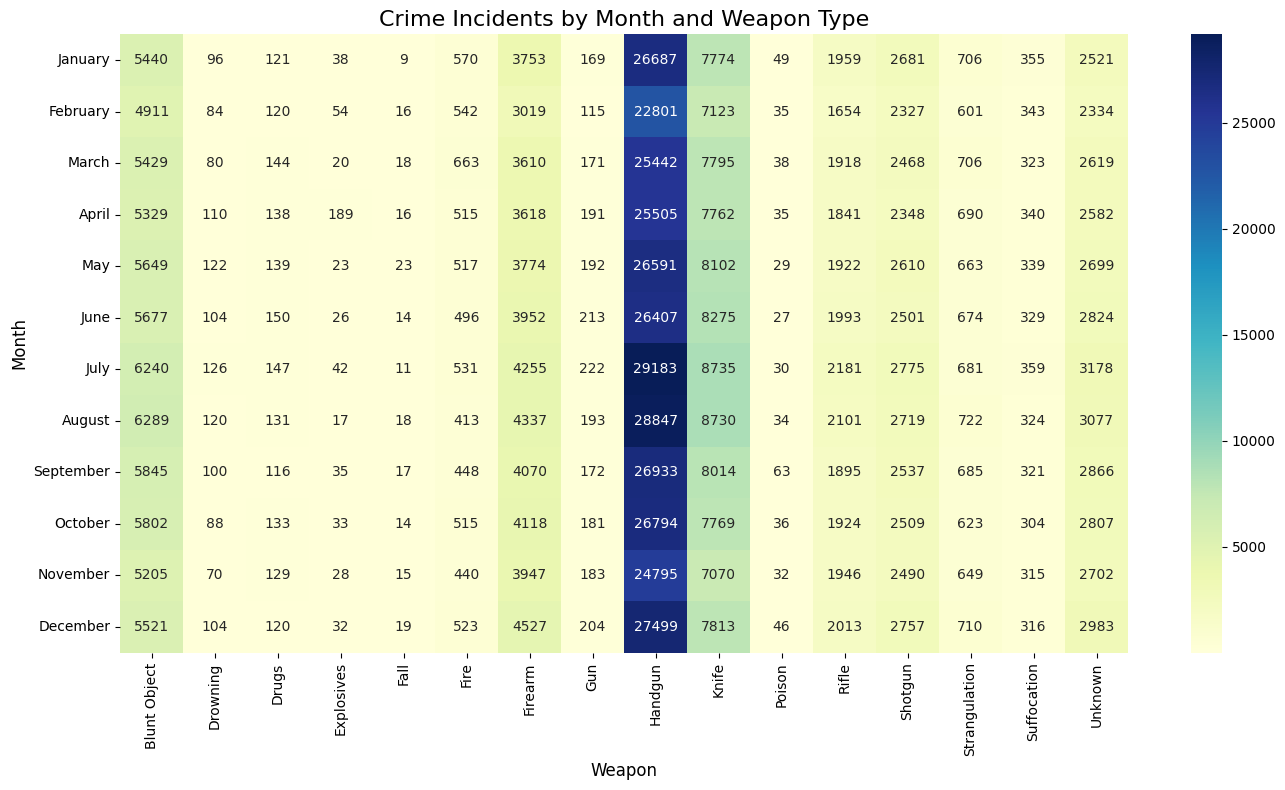

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset (replace with your dataset path)
file_path = 'cleaned_crime_data.csv'
crime_data = pd.read_csv(file_path)

# Group data by month and weapon type
month_weapon_data = (
    crime_data.groupby(['Month', 'Weapon'])
    .size()
    .reset_index(name='Incident Count')
)

# Pivot the data for heatmap visualization
month_weapon_pivot = month_weapon_data.pivot(
    index='Month', columns='Weapon', values='Incident Count'
).fillna(0)

# Ensure the months are ordered correctly
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
month_weapon_pivot = month_weapon_pivot.reindex(month_order)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    month_weapon_pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True
)
plt.title('Crime Incidents by Month and Weapon Type', fontsize=16)
plt.xlabel('Weapon', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\2237892339.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weapon_solving = cleaned_crime_data.groupby(['Weapon', 'Crime Solved']).size().unstack(fill_value=0)


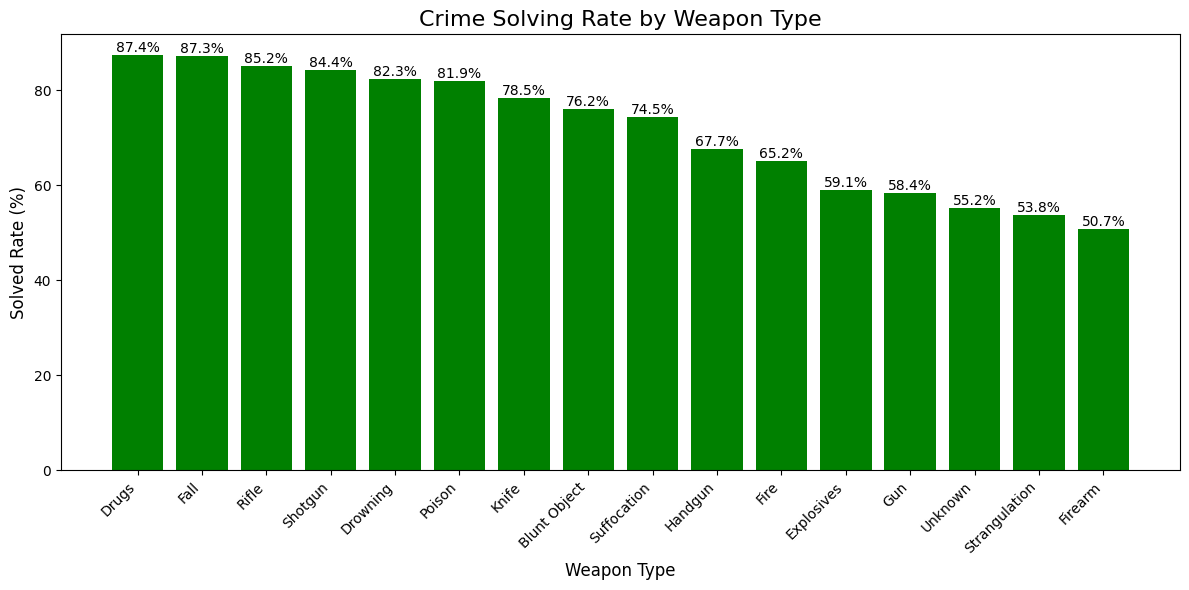


Weapon Solving Rates:
Crime Solved      No     Yes   Total  Solved Rate (%)
Weapon                                               
Drugs            191    1327    1518        87.417655
Fall              24     165     189        87.301587
Rifle           3252   18666   21918        85.162880
Shotgun         4602   24815   29417        84.355985
Drowning         204     950    1154        82.322357
Poison            75     339     414        81.884058
Knife          19985   72869   92854        78.476964
Blunt Object   15692   50103   65795        76.150163
Suffocation      965    2817    3782        74.484400
Handgun        99099  207768  306867        67.706205
Fire            1509    2825    4334        65.182280
Explosives       131     189     320        59.062500
Gun              855    1199    2054        58.373905
Unknown        14267   17551   31818        55.160601
Strangulation   3670    4267    7937        53.760867
Firearm        22179   22820   44999        50.712238


In [159]:
# Calculate crime solving rates by weapon type
weapon_solving = cleaned_crime_data.groupby(['Weapon', 'Crime Solved']).size().unstack(fill_value=0)
weapon_solving['Total'] = weapon_solving.sum(axis=1)
weapon_solving['Solved Rate (%)'] = (weapon_solving['Yes'] / weapon_solving['Total']) * 100

# Sort by solving rate
weapon_solving_sorted = weapon_solving.sort_values('Solved Rate (%)', ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))

# Create bar plot
bars = plt.bar(weapon_solving_sorted.index, weapon_solving_sorted['Solved Rate (%)'], color='green')

# Customize the plot
plt.title('Crime Solving Rate by Weapon Type', fontsize=16)
plt.xlabel('Weapon Type', fontsize=12)
plt.ylabel('Solved Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add percentage labels to bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()

# Optional: Print the full solving rates table
print("\nWeapon Solving Rates:")
print(weapon_solving_sorted)

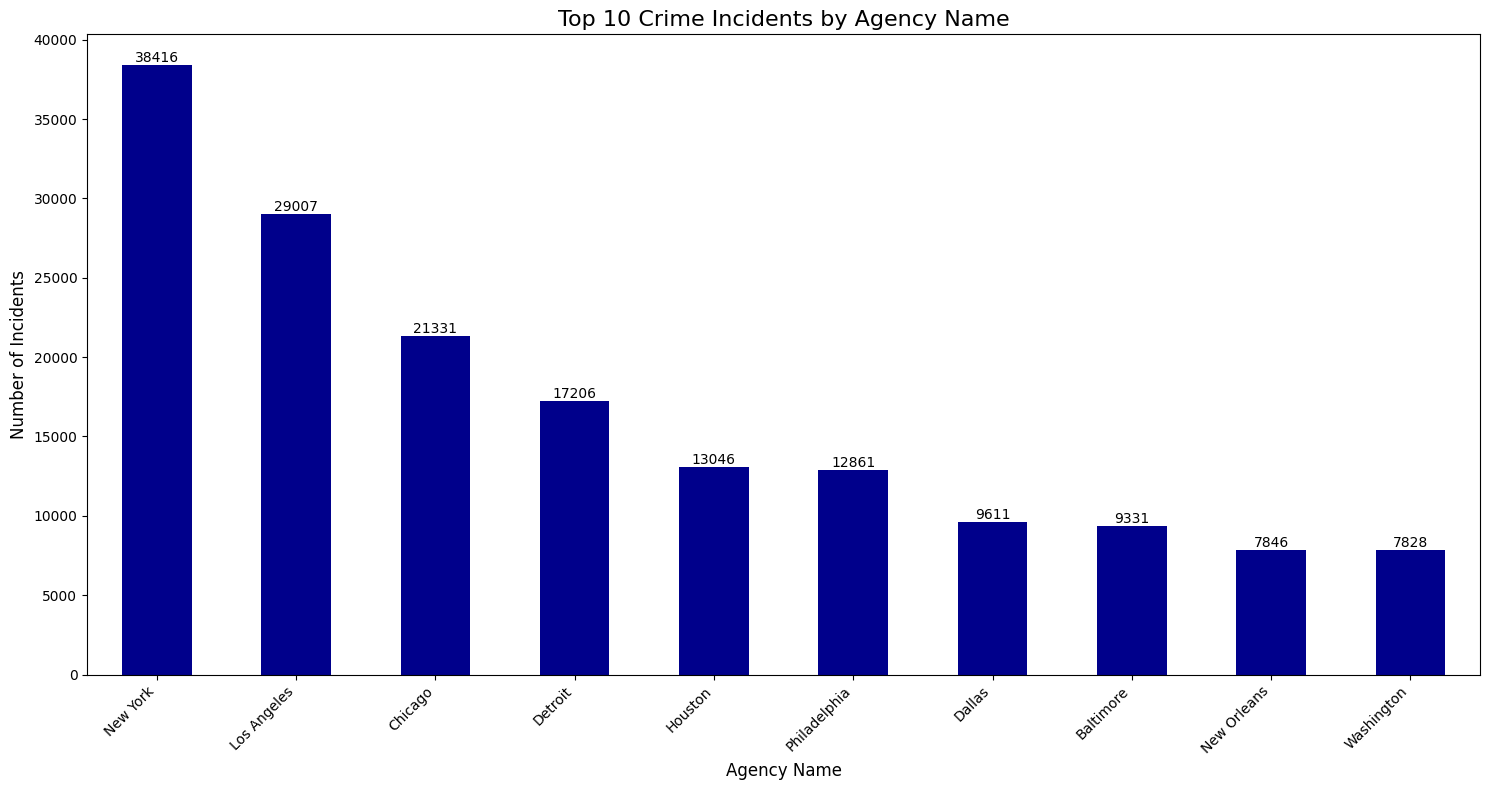

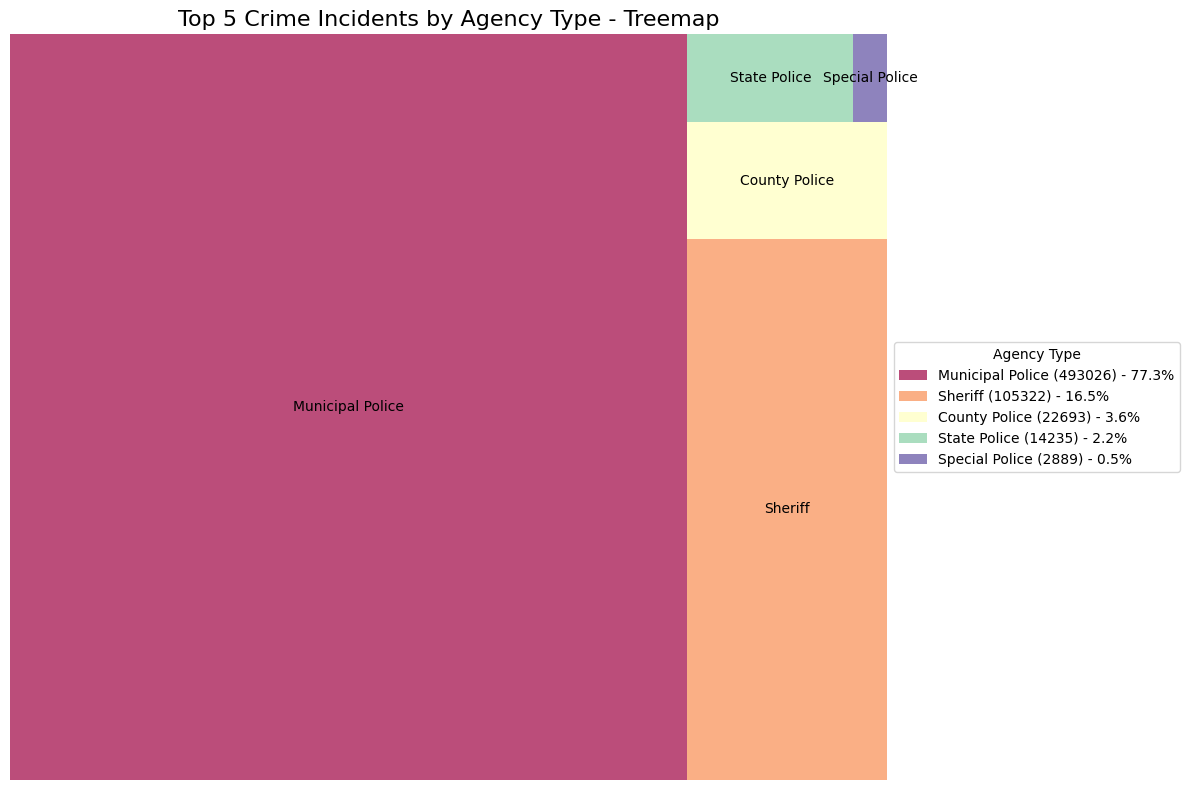

In [160]:
import squarify  # for treemap (you may need to pip install squarify)
import matplotlib.pyplot as plt
import numpy as np

# Visualization 1: Bar Chart of Top 10 Crime Incidents by Agency Name
def plot_top10_agency_incidents(crime_data):
    # Group by Agency Name and count incidents
    top_agency_incidents = crime_data['Agency Name'].value_counts().head(10)
    
    # Create a bar plot
    plt.figure(figsize=(15, 8))
    top_agency_incidents.plot(kind='bar', color='darkblue')
    plt.title('Top 10 Crime Incidents by Agency Name', fontsize=16)
    plt.xlabel('Agency Name', fontsize=12)
    plt.ylabel('Number of Incidents', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Add value labels on top of each bar
    for i, v in enumerate(top_agency_incidents):
        plt.text(i, v, str(v), ha='center', va='bottom')
    
    plt.show()

# Visualization 2: Treemap of Top 5 Crime Incidents by Agency Type
def plot_top5_agency_type_treemap(crime_data):
    # Group by Agency Type and count incidents
    top_agency_type_incidents = crime_data['Agency Type'].value_counts().head(5)
    
    # Create treemap
    plt.figure(figsize=(12, 8))
    squarify.plot(
        sizes=top_agency_type_incidents.values, 
        label=top_agency_type_incidents.index, 
        color=plt.cm.Spectral(np.linspace(0, 1, len(top_agency_type_incidents))),
        alpha=0.7
    )
    plt.title('Top 5 Crime Incidents by Agency Type - Treemap', fontsize=16)
    plt.axis('off')
    
    # Add a legend with percentages
    total_incidents = top_agency_type_incidents.sum()
    legend_labels = [f'{index} ({count}) - {count/total_incidents*100:.1f}%' 
                     for index, count in top_agency_type_incidents.items()]
    plt.legend(legend_labels, title='Agency Type', 
               loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()

# Execute all visualizations
def main():
    # Top 10 Agency Name Bar Chart
    plot_top10_agency_incidents(crime_data)
    
    # Top 5 Agency Type Treemap
    plot_top5_agency_type_treemap(crime_data)

# Run the main function
main()


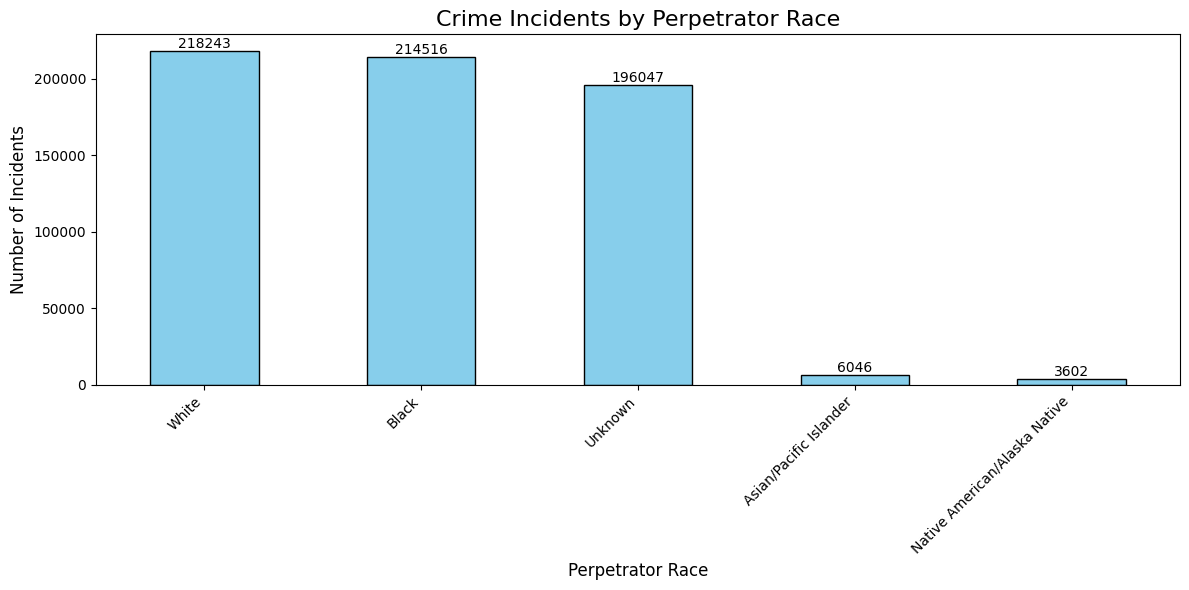

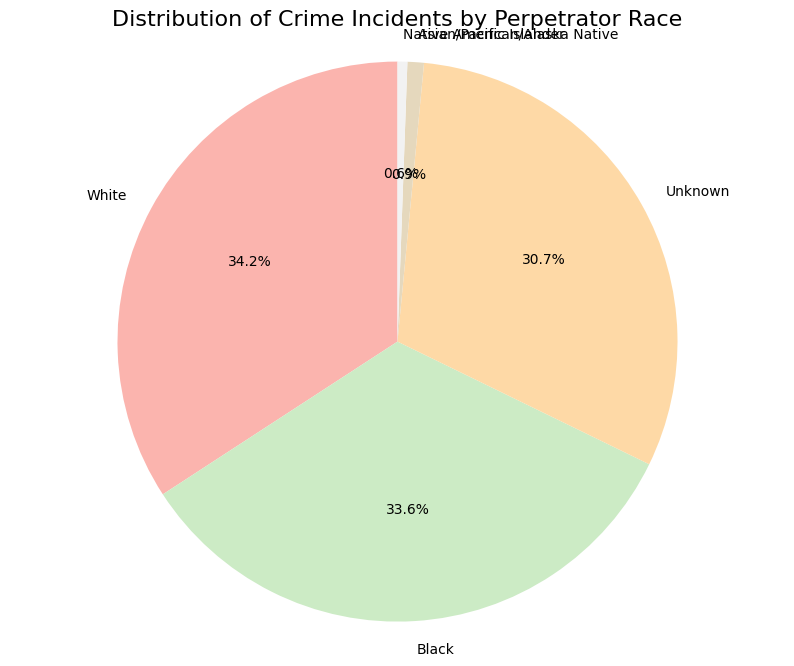

<Figure size 1500x800 with 0 Axes>

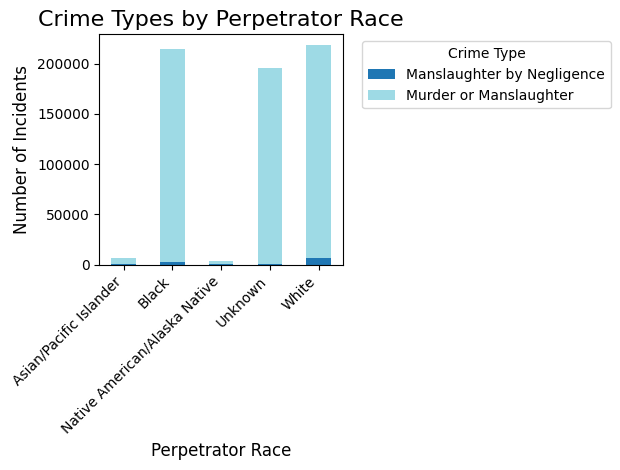


Perpetrator Race Incident Summary:
                               Total Incidents  Solve Rate (%)
Perpetrator Race                                              
White                                   218243       99.961053
Black                                   214516       99.919820
Unknown                                 196047        3.085485
Asian/Pacific Islander                    6046       99.669203
Native American/Alaska Native             3602       99.805664


In [161]:
def visualize_perpetrator_race_incidents(crime_data):
    # 1. Basic Count of Incidents by Perpetrator Race
    def plot_race_count_bar():
        plt.figure(figsize=(12, 6))
        
        # Count incidents by perpetrator race
        race_counts = crime_data['Perpetrator Race'].value_counts()
        
        # Create bar plot
        bars = race_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Crime Incidents by Perpetrator Race', fontsize=16)
        plt.xlabel('Perpetrator Race', fontsize=12)
        plt.ylabel('Number of Incidents', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        
        # Add value labels on top of each bar
        for i, v in enumerate(race_counts):
            plt.text(i, v, str(v), ha='center', va='bottom')
        
        plt.show()

    # 2. Percentage Distribution of Perpetrator Race
    def plot_race_percentage_pie():
        plt.figure(figsize=(10, 8))
        
        # Count incidents by perpetrator race
        race_counts = crime_data['Perpetrator Race'].value_counts()
        
        # Create pie chart
        plt.pie(
            race_counts.values, 
            labels=race_counts.index, 
            autopct='%1.1f%%',
            colors=plt.cm.Pastel1(np.linspace(0, 1, len(race_counts))),
            startangle=90
        )
        plt.title('Distribution of Crime Incidents by Perpetrator Race', fontsize=16)
        plt.axis('equal')
        plt.show()

    # 3. Stacked Bar: Perpetrator Race vs Crime Type
    def plot_race_crime_type_stacked():
        # Create a cross-tabulation of Race and Crime Type
        race_crime_crosstab = pd.crosstab(crime_data['Perpetrator Race'], crime_data['Crime Type'])
        
        plt.figure(figsize=(15, 8))
        race_crime_crosstab.plot(kind='bar', stacked=True, colormap='tab20')
        plt.title('Crime Types by Perpetrator Race', fontsize=16)
        plt.xlabel('Perpetrator Race', fontsize=12)
        plt.ylabel('Number of Incidents', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    # 4. Detailed Race Incident Analysis
    def race_incident_summary():
        # Create a summary DataFrame
        race_summary = crime_data.groupby('Perpetrator Race').agg({
            'Record ID': 'count',  # Total incidents
            'Crime Solved': lambda x: (x == 'Yes').mean() * 100  # Solve rate
        }).rename(columns={
            'Record ID': 'Total Incidents', 
            'Crime Solved': 'Solve Rate (%)'
        }).sort_values('Total Incidents', ascending=False)
        
        print("\nPerpetrator Race Incident Summary:")
        print(race_summary)
        
        # Optional: Save to CSV
        race_summary.to_csv('perpetrator_race_incident_summary.csv')
        
        return race_summary

    # 5. Heatmap of Crime Types by Perpetrator Race
    def plot_race_crime_heatmap():
        # Create a cross-tabulation of Race and Crime Type
        race_crime_crosstab = pd.crosstab(crime_data['Perpetrator Race'], crime_data['Crime Type'], normalize='index') * 100
        
        plt.figure(figsize=(15, 10))
        sns.heatmap(race_crime_crosstab, annot=True, cmap='YlGnBu', fmt='.1f')
        plt.title('Percentage of Crime Types by Perpetrator Race', fontsize=16)
        plt.xlabel('Crime Type', fontsize=12)
        plt.ylabel('Perpetrator Race', fontsize=12)
        plt.tight_layout()
        plt.show()

    # Execute all visualizations
    def main():
        # Bar Chart of Incidents by Perpetrator Race
        plot_race_count_bar()
        
        # Pie Chart of Perpetrator Race Distribution
        plot_race_percentage_pie()
        
        # Stacked Bar of Crime Types by Perpetrator Race
        plot_race_crime_type_stacked()
        
        # Detailed Race Incident Summary
        race_summary = race_incident_summary()


    # Run the main function
    main()

# Call the function with your crime data
visualize_perpetrator_race_incidents(crime_data)

C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\249970458.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_crime_data.groupby('Agency Name')


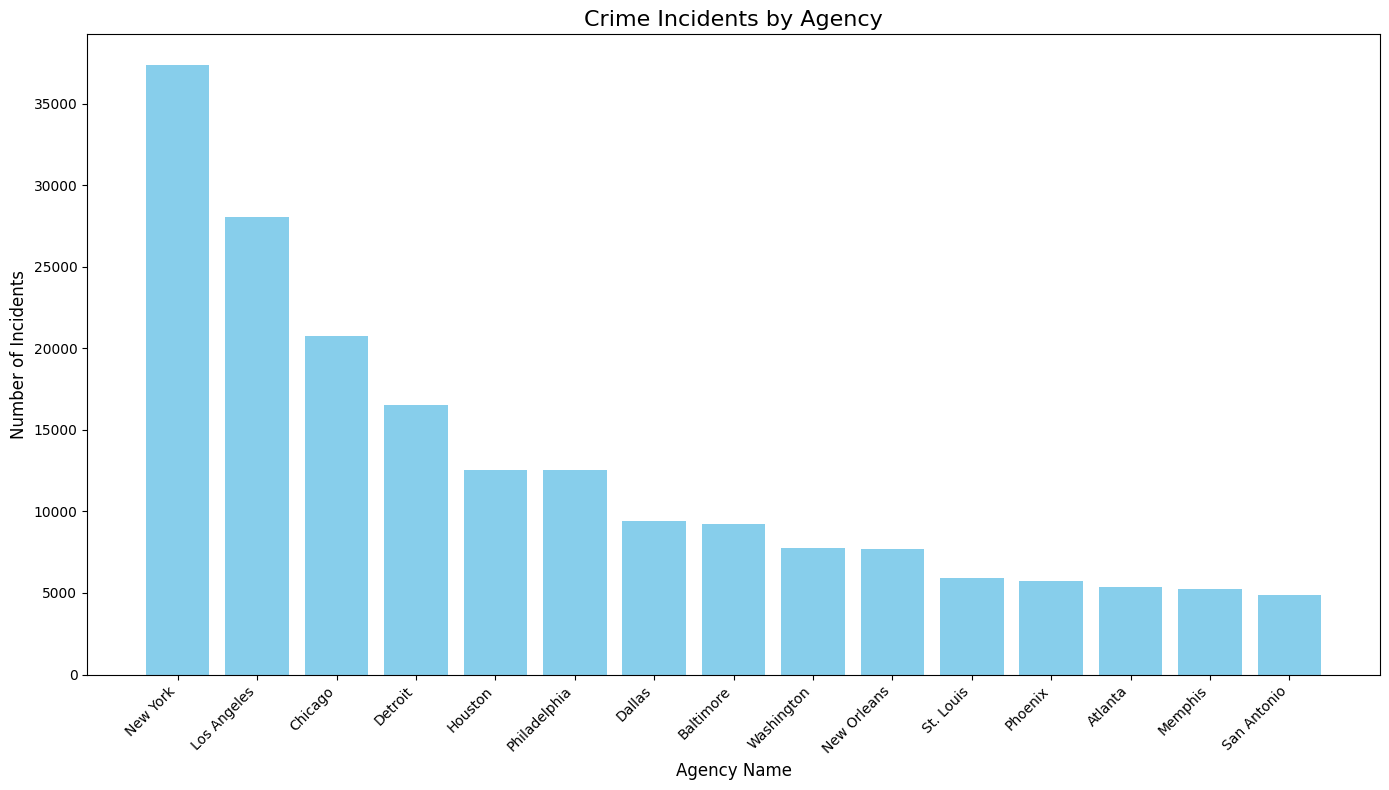

C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\249970458.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_crime_data.groupby('Agency Type')


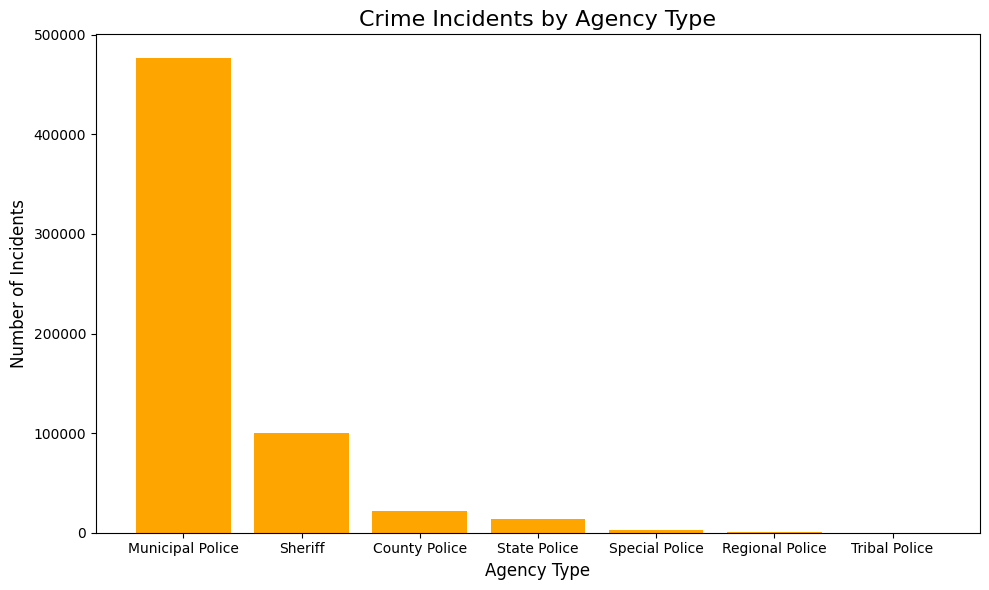

In [162]:
# Group data by 'Agency Name' to count incidents
agency_incidents = (
    cleaned_crime_data.groupby('Agency Name')
    .size()
    .reset_index(name='Incident Count')
    .sort_values('Incident Count', ascending=False)
)

# Select top 15 agencies by incident count for better visualization
top_agencies = agency_incidents.head(15)

# Plot incidents by agency as a bar chart
plt.figure(figsize=(14, 8))
plt.bar(top_agencies['Agency Name'], top_agencies['Incident Count'], color='skyblue')
plt.title('Crime Incidents by Agency', fontsize=16)
plt.xlabel('Agency Name', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Group data by 'Agency Type' to count incidents
agency_type_incidents = (
    cleaned_crime_data.groupby('Agency Type')
    .size()
    .reset_index(name='Incident Count')
    .sort_values('Incident Count', ascending=False)
)

# Plot incidents by agency type as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(agency_type_incidents['Agency Type'], agency_type_incidents['Incident Count'], color='orange')
plt.title('Crime Incidents by Agency Type', fontsize=16)
plt.xlabel('Agency Type', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\kimic\AppData\Local\Temp\ipykernel_4572\3409620235.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_crime_data.groupby('State')


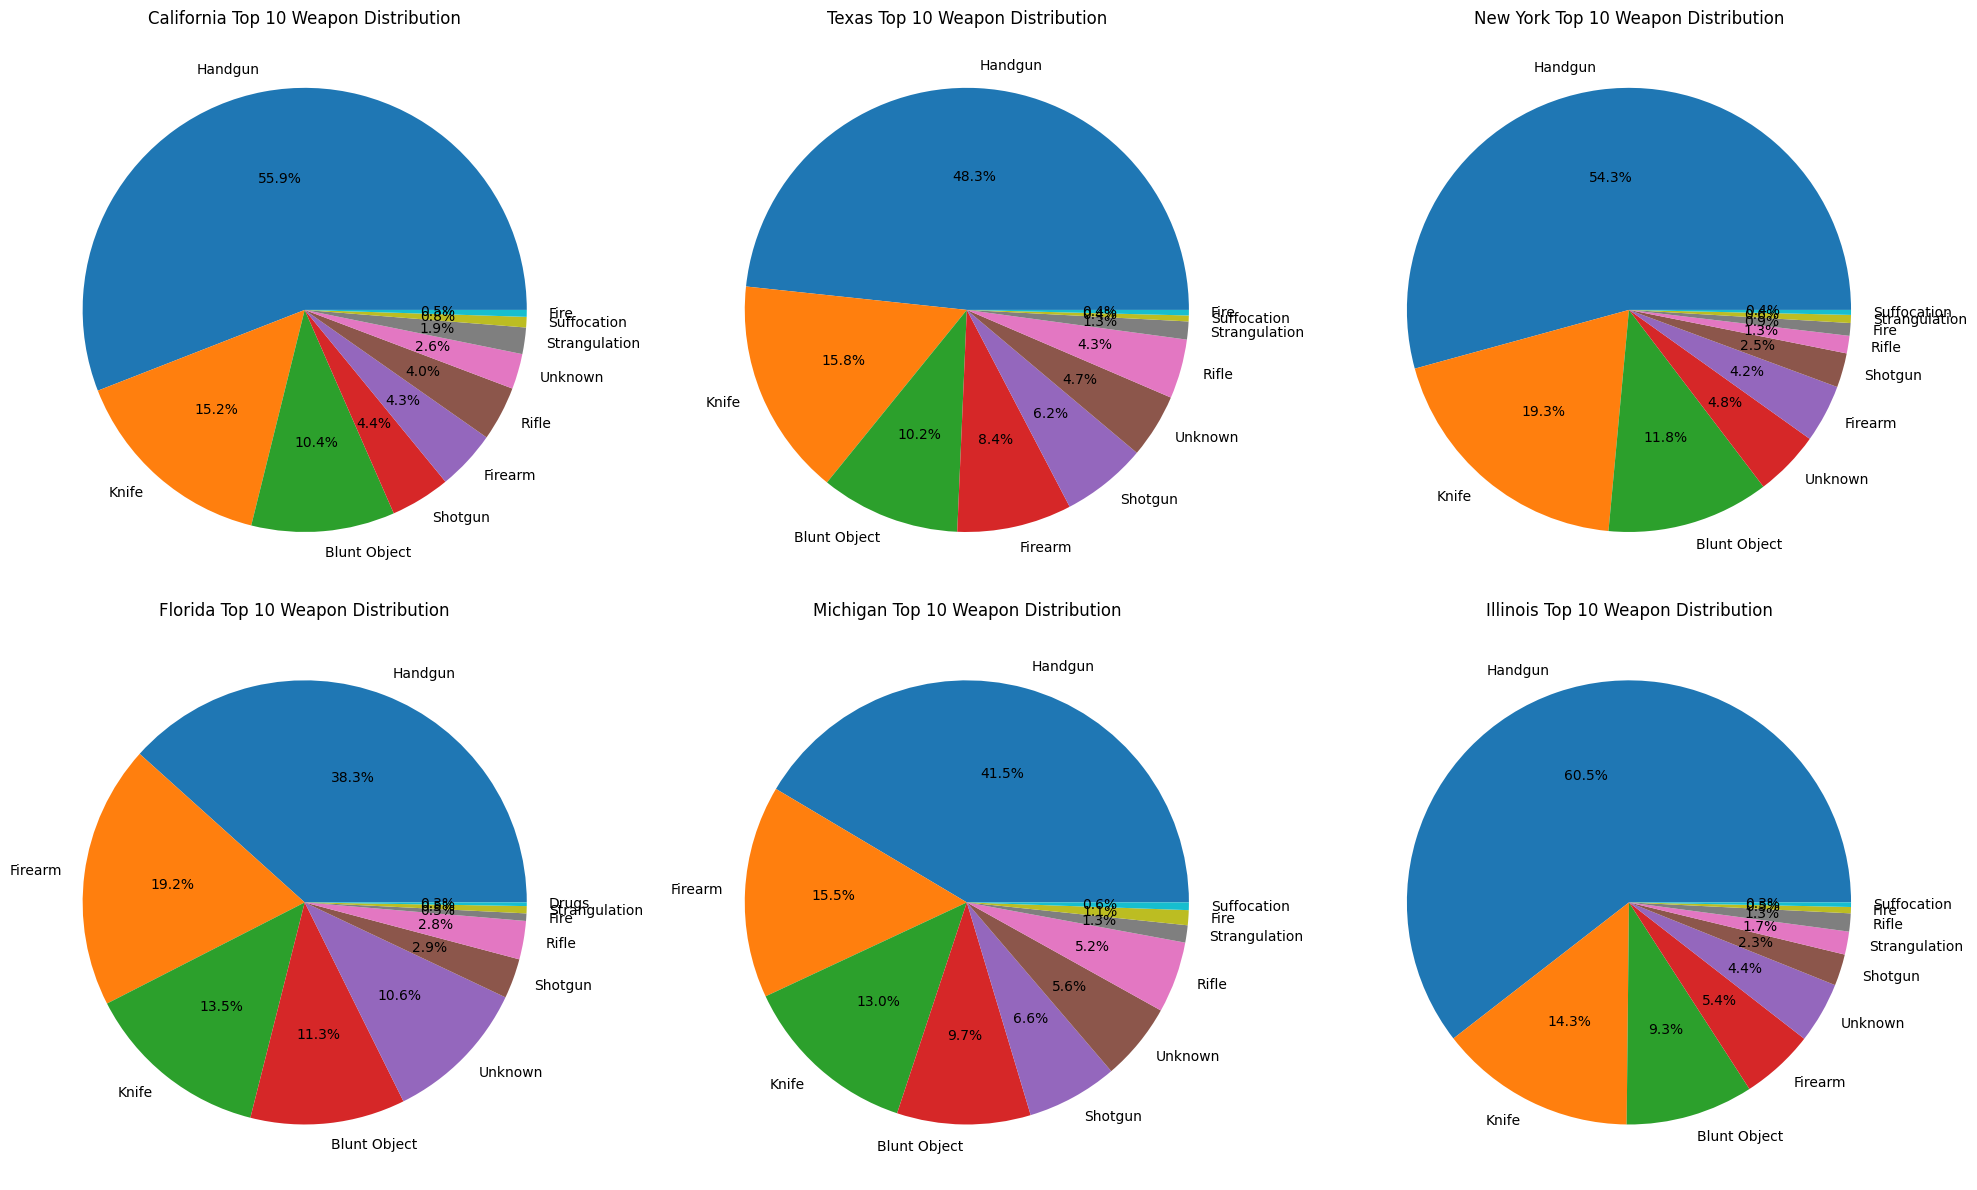

Top 6 States by Incident Count:
         State  Incident Count
4   California           96406
43       Texas           59915
32    New York           47811
9      Florida           36043
22    Michigan           27255
13    Illinois           25089


In [163]:
# Group data by 'State' to count incidents
state_incidents = (
    cleaned_crime_data.groupby('State')
    .size()
    .reset_index(name='Incident Count')
    .sort_values('Incident Count', ascending=False)
)

# Select top 6 states by incident count
top_states = state_incidents.head(6)['State'].tolist()

# Visualize top 6 states and their top 10 weapon distribution
plt.figure(figsize=(20, 12))
for i, state in enumerate(top_states, 1):
    plt.subplot(2, 3, i)
    
    # Filter data for the specific state
    state_data = cleaned_crime_data[cleaned_crime_data['State'] == state]
    
    # Group weapons for this state and select top 10
    weapon_counts = state_data['Weapon'].value_counts().head(10)
    
    # Create pie chart for top 10 weapons
    plt.pie(weapon_counts.values, labels=weapon_counts.index, autopct='%1.1f%%')
    plt.title(f'{state} Top 10 Weapon Distribution', fontsize=12)

plt.tight_layout()
plt.show()

# Print out the top 6 states and their total incident counts for reference
print("Top 6 States by Incident Count:")
print(state_incidents.head(6))